<p style="font-weight:bold; font-size:200%"> Multithread Insider Transaction Finder</p>

- Author: Yichen Luo
- Date: 20220825

In [255]:
import pandas as pd
import threading
import requests
import time
import os
import datetime
import re
import string
import random
import numpy as np
from web3 import Web3
from hexbytes import HexBytes
import seaborn as sns ; sns.set_theme(color_codes=True)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.core.interactiveshell import InteractiveShell
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)

RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'
InteractiveShell.ast_node_interactivity = 'all'

# MultiThread

## List

In [11]:
# lst = pd.read_csv(f'{WD}connected_wallet/panel/panel_complete.csv')

# for chain in ['ethereum', 'binance', 'avalanche', 'polygon']:
#     for dex in chain_info(chain):
#         dex
        
#         df = lst.loc[lst['chain'] == chain].copy()
#         df['status'] = -1
        
#         df
#         df.to_csv(f'{WD}connected_wallet_transaction/list/layer_one_{dex}.csv', index=False)

'uniswapv3_ethereum'

layer_one  \
4      0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
15     0x0056847e5721b884bfffde0142d3d7724da8ac2d   
16     0x005d233082deceeea2c8c40028f7061cd1e05066   
20     0x006c124ef4bdbc08a8961d69ebff97bfe3d45a79   
24     0x007a3d253bcdee3028b3eb9dc65dd97312d57c18   
...                                           ...   
21485  0xfec631b2428e870d7b0b324ae9136c5de6005a11   
21486  0xfeeb95db1dfe968b8f9f56d0b71438048d3ddabc   
21487  0xfeec85c46f99a9722636044d5ea0b5dfdd5c5cd7   
21488  0xff0a7ed07698ac75c7275ec65248c3f71d2a07c8   
21489  0xffdc686ce7aeba9814997b32fb5cc805b0adf635   

                          insider_contractAddress     chain     amountUSD  \
4      0x5c28dbdf5351089ca413b4493dd6c6043e44af42  ethereum   1556.044180   
15     0x916c5de09cf63f6602d1e1793fb41f6437814a62  ethereum   2638.843256   
16     0x3d3d5ac7590201cec07e7088145d17da535645e3  ethereum   2208.127500   
20     0x7f86166104c758cbc4c9a7dc19da807192dc6c73  ethereum   3322.159229   
24     0xc21d79947ec0aa2f3b7069486c85cfa123995c50  ethereum   5629.178237   
...                                           ...       ...           ...   
21485  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  11424.928154   
21486  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  10799.333669   
21487  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  19812.848943   
21488  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  24380.838486   
21489  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  17622.222396   

       status  
4          -1  
15         -1  
16         -1  
20         -1  
24         -1  
...       ...  
21485      -1  
21486      -1  
21487      -1  
21488      -1  
21489      -1  

[13547 rows x 5 columns]

'uniswapv2_ethereum'

layer_one  \
4      0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
15     0x0056847e5721b884bfffde0142d3d7724da8ac2d   
16     0x005d233082deceeea2c8c40028f7061cd1e05066   
20     0x006c124ef4bdbc08a8961d69ebff97bfe3d45a79   
24     0x007a3d253bcdee3028b3eb9dc65dd97312d57c18   
...                                           ...   
21485  0xfec631b2428e870d7b0b324ae9136c5de6005a11   
21486  0xfeeb95db1dfe968b8f9f56d0b71438048d3ddabc   
21487  0xfeec85c46f99a9722636044d5ea0b5dfdd5c5cd7   
21488  0xff0a7ed07698ac75c7275ec65248c3f71d2a07c8   
21489  0xffdc686ce7aeba9814997b32fb5cc805b0adf635   

                          insider_contractAddress     chain     amountUSD  \
4      0x5c28dbdf5351089ca413b4493dd6c6043e44af42  ethereum   1556.044180   
15     0x916c5de09cf63f6602d1e1793fb41f6437814a62  ethereum   2638.843256   
16     0x3d3d5ac7590201cec07e7088145d17da535645e3  ethereum   2208.127500   
20     0x7f86166104c758cbc4c9a7dc19da807192dc6c73  ethereum   3322.159229   
24     0xc21d79947ec0aa2f3b7069486c85cfa123995c50  ethereum   5629.178237   
...                                           ...       ...           ...   
21485  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  11424.928154   
21486  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  10799.333669   
21487  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  19812.848943   
21488  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  24380.838486   
21489  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  17622.222396   

       status  
4          -1  
15         -1  
16         -1  
20         -1  
24         -1  
...       ...  
21485      -1  
21486      -1  
21487      -1  
21488      -1  
21489      -1  

[13547 rows x 5 columns]

'sushiswap_ethereum'

layer_one  \
4      0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
15     0x0056847e5721b884bfffde0142d3d7724da8ac2d   
16     0x005d233082deceeea2c8c40028f7061cd1e05066   
20     0x006c124ef4bdbc08a8961d69ebff97bfe3d45a79   
24     0x007a3d253bcdee3028b3eb9dc65dd97312d57c18   
...                                           ...   
21485  0xfec631b2428e870d7b0b324ae9136c5de6005a11   
21486  0xfeeb95db1dfe968b8f9f56d0b71438048d3ddabc   
21487  0xfeec85c46f99a9722636044d5ea0b5dfdd5c5cd7   
21488  0xff0a7ed07698ac75c7275ec65248c3f71d2a07c8   
21489  0xffdc686ce7aeba9814997b32fb5cc805b0adf635   

                          insider_contractAddress     chain     amountUSD  \
4      0x5c28dbdf5351089ca413b4493dd6c6043e44af42  ethereum   1556.044180   
15     0x916c5de09cf63f6602d1e1793fb41f6437814a62  ethereum   2638.843256   
16     0x3d3d5ac7590201cec07e7088145d17da535645e3  ethereum   2208.127500   
20     0x7f86166104c758cbc4c9a7dc19da807192dc6c73  ethereum   3322.159229   
24     0xc21d79947ec0aa2f3b7069486c85cfa123995c50  ethereum   5629.178237   
...                                           ...       ...           ...   
21485  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  11424.928154   
21486  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  10799.333669   
21487  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  19812.848943   
21488  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  24380.838486   
21489  0xd9d9869b2c7b1eec43e632a72678085870c288c6  ethereum  17622.222396   

       status  
4          -1  
15         -1  
16         -1  
20         -1  
24         -1  
...       ...  
21485      -1  
21486      -1  
21487      -1  
21488      -1  
21489      -1  

[13547 rows x 5 columns]

'pancake_binance'

layer_one  \
0      0x000159831a681a63b01911b9c162fbb8949976ba   
1      0x0007a6a1eae3f82897f92f2e9fc476c4be8d4243   
2      0x0009343103cbe1d0898f6f19f0f9442770d008e4   
3      0x0010af1fef93215f345b3531f8d9a39efec93ffb   
5      0x001cd06366ac4aa869f398f532499a00aa68e182   
...                                           ...   
25033  0xdf9eec260da99a01b2b893ac512d05c6fbed83a6   
25034  0xe84638119acd8b7c4c1de08d03027c7a46bd4ae1   
25035  0xf41399aac0d78cc955108e12916204d90faff875   
25036  0xfb29ace7a0d650969ca940ecfb0d904d13ddc23f   
25037  0xfe7e63a00d831a4d195be12e3a8d9c4714c909f2   

                          insider_contractAddress    chain     amountUSD  \
0      0x6670d7d4091d9c2f4fb915291630da9146490681  binance  36469.024594   
1      0xaf1167b1f90e4f27d9f520a4cd3a1e452e011cea  binance   2404.686263   
2      0xbc23833d965632cec84bf98181cb84c31bbdfa94  binance   1356.067500   
3      0x643ecd70611e240259e5974468dad69560c5c892  binance   5986.534576   
5      0xde301d6a2569aefcfe271b9d98f318baee1d30a4  binance   1845.583062   
...                                           ...      ...           ...   
25033  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1684.401378   
25034  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   2561.882619   
25035  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1946.795993   
25036  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1201.676021   
25037  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1498.613957   

       status  
0          -1  
1          -1  
2          -1  
3          -1  
5          -1  
...       ...  
25033      -1  
25034      -1  
25035      -1  
25036      -1  
25037      -1  

[11355 rows x 5 columns]

'biswap_binance'

layer_one  \
0      0x000159831a681a63b01911b9c162fbb8949976ba   
1      0x0007a6a1eae3f82897f92f2e9fc476c4be8d4243   
2      0x0009343103cbe1d0898f6f19f0f9442770d008e4   
3      0x0010af1fef93215f345b3531f8d9a39efec93ffb   
5      0x001cd06366ac4aa869f398f532499a00aa68e182   
...                                           ...   
25033  0xdf9eec260da99a01b2b893ac512d05c6fbed83a6   
25034  0xe84638119acd8b7c4c1de08d03027c7a46bd4ae1   
25035  0xf41399aac0d78cc955108e12916204d90faff875   
25036  0xfb29ace7a0d650969ca940ecfb0d904d13ddc23f   
25037  0xfe7e63a00d831a4d195be12e3a8d9c4714c909f2   

                          insider_contractAddress    chain     amountUSD  \
0      0x6670d7d4091d9c2f4fb915291630da9146490681  binance  36469.024594   
1      0xaf1167b1f90e4f27d9f520a4cd3a1e452e011cea  binance   2404.686263   
2      0xbc23833d965632cec84bf98181cb84c31bbdfa94  binance   1356.067500   
3      0x643ecd70611e240259e5974468dad69560c5c892  binance   5986.534576   
5      0xde301d6a2569aefcfe271b9d98f318baee1d30a4  binance   1845.583062   
...                                           ...      ...           ...   
25033  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1684.401378   
25034  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   2561.882619   
25035  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1946.795993   
25036  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1201.676021   
25037  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1498.613957   

       status  
0          -1  
1          -1  
2          -1  
3          -1  
5          -1  
...       ...  
25033      -1  
25034      -1  
25035      -1  
25036      -1  
25037      -1  

[11355 rows x 5 columns]

'apeswap_binance'

layer_one  \
0      0x000159831a681a63b01911b9c162fbb8949976ba   
1      0x0007a6a1eae3f82897f92f2e9fc476c4be8d4243   
2      0x0009343103cbe1d0898f6f19f0f9442770d008e4   
3      0x0010af1fef93215f345b3531f8d9a39efec93ffb   
5      0x001cd06366ac4aa869f398f532499a00aa68e182   
...                                           ...   
25033  0xdf9eec260da99a01b2b893ac512d05c6fbed83a6   
25034  0xe84638119acd8b7c4c1de08d03027c7a46bd4ae1   
25035  0xf41399aac0d78cc955108e12916204d90faff875   
25036  0xfb29ace7a0d650969ca940ecfb0d904d13ddc23f   
25037  0xfe7e63a00d831a4d195be12e3a8d9c4714c909f2   

                          insider_contractAddress    chain     amountUSD  \
0      0x6670d7d4091d9c2f4fb915291630da9146490681  binance  36469.024594   
1      0xaf1167b1f90e4f27d9f520a4cd3a1e452e011cea  binance   2404.686263   
2      0xbc23833d965632cec84bf98181cb84c31bbdfa94  binance   1356.067500   
3      0x643ecd70611e240259e5974468dad69560c5c892  binance   5986.534576   
5      0xde301d6a2569aefcfe271b9d98f318baee1d30a4  binance   1845.583062   
...                                           ...      ...           ...   
25033  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1684.401378   
25034  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   2561.882619   
25035  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1946.795993   
25036  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1201.676021   
25037  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1498.613957   

       status  
0          -1  
1          -1  
2          -1  
3          -1  
5          -1  
...       ...  
25033      -1  
25034      -1  
25035      -1  
25036      -1  
25037      -1  

[11355 rows x 5 columns]

'babyswap_binance'

layer_one  \
0      0x000159831a681a63b01911b9c162fbb8949976ba   
1      0x0007a6a1eae3f82897f92f2e9fc476c4be8d4243   
2      0x0009343103cbe1d0898f6f19f0f9442770d008e4   
3      0x0010af1fef93215f345b3531f8d9a39efec93ffb   
5      0x001cd06366ac4aa869f398f532499a00aa68e182   
...                                           ...   
25033  0xdf9eec260da99a01b2b893ac512d05c6fbed83a6   
25034  0xe84638119acd8b7c4c1de08d03027c7a46bd4ae1   
25035  0xf41399aac0d78cc955108e12916204d90faff875   
25036  0xfb29ace7a0d650969ca940ecfb0d904d13ddc23f   
25037  0xfe7e63a00d831a4d195be12e3a8d9c4714c909f2   

                          insider_contractAddress    chain     amountUSD  \
0      0x6670d7d4091d9c2f4fb915291630da9146490681  binance  36469.024594   
1      0xaf1167b1f90e4f27d9f520a4cd3a1e452e011cea  binance   2404.686263   
2      0xbc23833d965632cec84bf98181cb84c31bbdfa94  binance   1356.067500   
3      0x643ecd70611e240259e5974468dad69560c5c892  binance   5986.534576   
5      0xde301d6a2569aefcfe271b9d98f318baee1d30a4  binance   1845.583062   
...                                           ...      ...           ...   
25033  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1684.401378   
25034  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   2561.882619   
25035  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1946.795993   
25036  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1201.676021   
25037  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1498.613957   

       status  
0          -1  
1          -1  
2          -1  
3          -1  
5          -1  
...       ...  
25033      -1  
25034      -1  
25035      -1  
25036      -1  
25037      -1  

[11355 rows x 5 columns]

'jetswap_binance'

layer_one  \
0      0x000159831a681a63b01911b9c162fbb8949976ba   
1      0x0007a6a1eae3f82897f92f2e9fc476c4be8d4243   
2      0x0009343103cbe1d0898f6f19f0f9442770d008e4   
3      0x0010af1fef93215f345b3531f8d9a39efec93ffb   
5      0x001cd06366ac4aa869f398f532499a00aa68e182   
...                                           ...   
25033  0xdf9eec260da99a01b2b893ac512d05c6fbed83a6   
25034  0xe84638119acd8b7c4c1de08d03027c7a46bd4ae1   
25035  0xf41399aac0d78cc955108e12916204d90faff875   
25036  0xfb29ace7a0d650969ca940ecfb0d904d13ddc23f   
25037  0xfe7e63a00d831a4d195be12e3a8d9c4714c909f2   

                          insider_contractAddress    chain     amountUSD  \
0      0x6670d7d4091d9c2f4fb915291630da9146490681  binance  36469.024594   
1      0xaf1167b1f90e4f27d9f520a4cd3a1e452e011cea  binance   2404.686263   
2      0xbc23833d965632cec84bf98181cb84c31bbdfa94  binance   1356.067500   
3      0x643ecd70611e240259e5974468dad69560c5c892  binance   5986.534576   
5      0xde301d6a2569aefcfe271b9d98f318baee1d30a4  binance   1845.583062   
...                                           ...      ...           ...   
25033  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1684.401378   
25034  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   2561.882619   
25035  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1946.795993   
25036  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1201.676021   
25037  0x0ccd575bf9378c06f6dca82f8122f570769f00c2  binance   1498.613957   

       status  
0          -1  
1          -1  
2          -1  
3          -1  
5          -1  
...       ...  
25033      -1  
25034      -1  
25035      -1  
25036      -1  
25037      -1  

[11355 rows x 5 columns]

'traderjoe_avalanche'

layer_one  \
21     0x006c8f45e89d9c1319867b6ecbc91c8d2eee29e2   
151    0x0346cd820927b561e7110b9284baeda9216f8d46   
214    0x04e1d84d3d5300d3a049c413e2287d8e049251e2   
300    0x06a8e7b0a92955669d2687fb9b29514f82d346e1   
329    0x074c250c17135d0afb7e573b03fb9e3c0c478e78   
...                                           ...   
10675  0xf578c51e9edbd6bc7328ed0d783471d8606d7567   
10720  0xf68cee0f0f22c4bf79d2b2edea617561c9a8fea2   
10922  0xfacaef557877b64a11fd73494797fcd2c0bd4f7f   
10953  0xfb7ca7a9d1f21b780a3ca59a0602c92ae212101c   
11011  0xfcad4c8ae4261620f41d805c0462177b9f44a1ff   

                          insider_contractAddress      chain      amountUSD  \
21     0x0755fa2f4aa6311e1d7c19990416c86f17d16f86  avalanche    1016.537513   
151    0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche   11512.316605   
214    0x0755fa2f4aa6311e1d7c19990416c86f17d16f86  avalanche    2472.424077   
300    0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche    2584.891175   
329    0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche  108565.429800   
...                                           ...        ...            ...   
10675  0x3aca5545e76746a3fe13ea66b24bc0ebcc51e6b4  avalanche    7473.068256   
10720  0x69a61f38df59cbb51962e69c54d39184e21c27ec  avalanche   11802.776674   
10922  0x0755fa2f4aa6311e1d7c19990416c86f17d16f86  avalanche    1480.493459   
10953  0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche   53972.527958   
11011  0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche   11512.316605   

       status  
21         -1  
151        -1  
214        -1  
300        -1  
329        -1  
...       ...  
10675      -1  
10720      -1  
10922      -1  
10953      -1  
11011      -1  

[134 rows x 5 columns]

'pangolin_avalanche'

layer_one  \
21     0x006c8f45e89d9c1319867b6ecbc91c8d2eee29e2   
151    0x0346cd820927b561e7110b9284baeda9216f8d46   
214    0x04e1d84d3d5300d3a049c413e2287d8e049251e2   
300    0x06a8e7b0a92955669d2687fb9b29514f82d346e1   
329    0x074c250c17135d0afb7e573b03fb9e3c0c478e78   
...                                           ...   
10675  0xf578c51e9edbd6bc7328ed0d783471d8606d7567   
10720  0xf68cee0f0f22c4bf79d2b2edea617561c9a8fea2   
10922  0xfacaef557877b64a11fd73494797fcd2c0bd4f7f   
10953  0xfb7ca7a9d1f21b780a3ca59a0602c92ae212101c   
11011  0xfcad4c8ae4261620f41d805c0462177b9f44a1ff   

                          insider_contractAddress      chain      amountUSD  \
21     0x0755fa2f4aa6311e1d7c19990416c86f17d16f86  avalanche    1016.537513   
151    0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche   11512.316605   
214    0x0755fa2f4aa6311e1d7c19990416c86f17d16f86  avalanche    2472.424077   
300    0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche    2584.891175   
329    0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche  108565.429800   
...                                           ...        ...            ...   
10675  0x3aca5545e76746a3fe13ea66b24bc0ebcc51e6b4  avalanche    7473.068256   
10720  0x69a61f38df59cbb51962e69c54d39184e21c27ec  avalanche   11802.776674   
10922  0x0755fa2f4aa6311e1d7c19990416c86f17d16f86  avalanche    1480.493459   
10953  0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche   53972.527958   
11011  0x7086e045b78e1e72f741f25231c08d238812cf8a  avalanche   11512.316605   

       status  
21         -1  
151        -1  
214        -1  
300        -1  
329        -1  
...       ...  
10675      -1  
10720      -1  
10922      -1  
10953      -1  
11011      -1  

[134 rows x 5 columns]

'sushiswap_polygon'

layer_one  \
6024  0x885f5fd87e62ed2ebd0b0bb1c295c4c43edee5b5   
8442  0xc149961ddcaf285d3c60c362a71085e23a02c812   

                         insider_contractAddress    chain     amountUSD  \
6024  0x21f9b5b2626603e3f40bfc13d01afb8c431d382f  polygon  1.562197e+07   
8442  0x44d09156c7b4acf0c64459fbcced7613f5519918  polygon  7.136849e+03   

      status  
6024      -1  
8442      -1

'apeswap_polygon'

layer_one  \
6024  0x885f5fd87e62ed2ebd0b0bb1c295c4c43edee5b5   
8442  0xc149961ddcaf285d3c60c362a71085e23a02c812   

                         insider_contractAddress    chain     amountUSD  \
6024  0x21f9b5b2626603e3f40bfc13d01afb8c431d382f  polygon  1.562197e+07   
8442  0x44d09156c7b4acf0c64459fbcced7613f5519918  polygon  7.136849e+03   

      status  
6024      -1  
8442      -1

'jetswap_polygon'

layer_one  \
6024  0x885f5fd87e62ed2ebd0b0bb1c295c4c43edee5b5   
8442  0xc149961ddcaf285d3c60c362a71085e23a02c812   

                         insider_contractAddress    chain     amountUSD  \
6024  0x21f9b5b2626603e3f40bfc13d01afb8c431d382f  polygon  1.562197e+07   
8442  0x44d09156c7b4acf0c64459fbcced7613f5519918  polygon  7.136849e+03   

      status  
6024      -1  
8442      -1

## Insider Transaction

In [42]:
class web_thread(threading.Thread):
    
    def __init__ (self, dex):
        threading.Thread.__init__(self)
        self.dex = dex
        
    def run(self):
        RD = '/home/team_defi/02_rdata/'
        WD = '/home/team_defi/03_wdata/'
        RES = '/home/team_defi/04_result/'
        
        lst = pd.read_csv(f'{WD}connected_wallet_transaction/list/layer_one_{self.dex}.csv')
        
        done = lst.loc[lst['status'] != -1].shape[0]
        total = lst.shape[0]
        
        for idx, row in lst.loc[lst['status'] == -1].iterrows():
            layer_one = row['layer_one']
            insider_contractAddress = row['insider_contractAddress']
            chain = row['chain']
            
            try:
                done += 1
                
                dfs = insider_transaction(address=layer_one, dex=self.dex)
                
                if len(dfs) == 0:
                    lst.loc[lst['layer_one'] == layer_one, 'status'] = 0
                    print(f'{layer_one}, {self.dex} no swap, {done}/{total}')
                else:
                    dfs.to_csv(f'{WD}connected_wallet_transaction/csv/{layer_one}_{self.dex}.csv', index=False)
                    length = dfs.shape[0]
                    lst.loc[lst['layer_one'] == layer_one, 'status'] = length
                    print(f'{layer_one}, {self.dex} find {length} swap, {done}/{total}')
                
                lst.to_csv(f'{WD}connected_wallet_transaction/list/layer_one_{self.dex}.csv', index=False)
                
            except Exception as e:
                time.sleep(2)
                print(f'{layer_one}, {self.dex}, Error: {e}')
                
        print(f'{self.dex} done')

In [86]:
thread1 = web_thread('uniswapv3_ethereum')
thread2 = web_thread('uniswapv2_ethereum')
thread3 = web_thread('sushiswap_ethereum')

thread4 = web_thread('pancake_binance')
thread5 = web_thread('biswap_binance')
thread6 = web_thread('apeswap_binance')
thread7 = web_thread('babyswap_binance')
thread8 = web_thread('jetswap_binance')

thread9 = web_thread('traderjoe_avalanche')
thread10 = web_thread('pangolin_avalanche')

thread11 = web_thread('sushiswap_polygon')
thread12 = web_thread('apeswap_polygon')
thread13 = web_thread('jetswap_polygon')

In [ ]:
Threads = [
           thread1, 
           thread2, 
           thread3,
           thread4,
           thread5,
           thread6,
           thread7,
           thread8,
           thread9,
           thread10,
           thread11,
           thread12,
           thread13,
          ]
for t in Threads:
    t.start()
for t in Threads:
    t.join()

traderjoe_avalanche donesushiswap_ethereum done

uniswapv3_ethereum done
sushiswap_polygon done
apeswap_binance done
pangolin_avalanche done
jetswap_polygon done
biswap_binance done
apeswap_polygon done
babyswap_binance done
jetswap_binance done
0x001cd06366ac4aa869f398f532499a00aa68e182, pancake_binance, Error: 'data'
0xf07704777d6bc182bf2c67fbda48913169b84983, uniswapv2_ethereum, Error: [Errno Expecting value] <!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<meta http-equiv="refresh" content="0">

<title>api.thegraph.com | 524: A timeout occurred</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="

# Home Token

## Isolation

In [18]:
for chain in ['ethereum', 'binance', 'avalanche', 'polygon']:
    dfs = []
    
    for dex in chain_info(chain):

        
        lst = pd.read_csv(f'{WD}connected_wallet_transaction/list/layer_one_{dex}.csv')
        
        total = lst.loc[lst['status'] > 0].shape[0]
        num = 0
        
        for idx, row in lst.loc[lst['status'] > 0].iterrows():
            num += 1
            print(f'{dex}, {num}/{total}')
            layer_one = row['layer_one']
            insider_contractAddress = row['insider_contractAddress']
            
            
            df = pd.read_csv(f'{WD}connected_wallet_transaction/csv/{layer_one}_{dex}.csv')
            df = home_token_filter(df, insider_contractAddress)
            df = df.loc[df['home_token'] == True]
            
            if df.shape[0] != 0:
                df['dex'] = dex
                df['chain'] = chain
                df['insider_layer_one'] = layer_one
                df['insider_contractAddress'] = insider_contractAddress
                dfs.append(df)
                
                
    if len(dfs) != 0:
        dfs = pd.concat(dfs)
        dfs.to_csv(f'{WD}connected_wallet_transaction/list_lp/{chain}.csv', index=False)

uniswapv3_ethereum, 1/7433
uniswapv3_ethereum, 2/7433
uniswapv3_ethereum, 3/7433
uniswapv3_ethereum, 4/7433
uniswapv3_ethereum, 5/7433
uniswapv3_ethereum, 6/7433
uniswapv3_ethereum, 7/7433
uniswapv3_ethereum, 8/7433
uniswapv3_ethereum, 9/7433
uniswapv3_ethereum, 10/7433
uniswapv3_ethereum, 11/7433
uniswapv3_ethereum, 12/7433
uniswapv3_ethereum, 13/7433
uniswapv3_ethereum, 14/7433
uniswapv3_ethereum, 15/7433
uniswapv3_ethereum, 16/7433
uniswapv3_ethereum, 17/7433
uniswapv3_ethereum, 18/7433
uniswapv3_ethereum, 19/7433
uniswapv3_ethereum, 20/7433
uniswapv3_ethereum, 21/7433
uniswapv3_ethereum, 22/7433
uniswapv3_ethereum, 23/7433
uniswapv3_ethereum, 24/7433
uniswapv3_ethereum, 25/7433
uniswapv3_ethereum, 26/7433
uniswapv3_ethereum, 27/7433
uniswapv3_ethereum, 28/7433
uniswapv3_ethereum, 29/7433
uniswapv3_ethereum, 30/7433
uniswapv3_ethereum, 31/7433
uniswapv3_ethereum, 32/7433
uniswapv3_ethereum, 33/7433
uniswapv3_ethereum, 34/7433
uniswapv3_ethereum, 35/7433
uniswapv3_ethereum, 36/7433
u

## Check

In [14]:
dfs = []
for chain in ['ethereum', 'binance', 'avalanche']:   
    df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/{chain}.csv')
    df
    dfs.append(df)
    
dfs = pd.concat(dfs)
dfs.to_csv(f'{WD}connected_wallet_transaction/list_lp/panel.csv')

amountUSD  \
0       4716.034753   
1       3440.269325   
2      13438.549182   
3       4739.261742   
4       9395.642762   
...             ...   
22716   1805.586386   
22717    614.711242   
22718   2712.691793   
22719   1951.254189   
22720   1390.841193   

                                                                             id  \
0      0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273#35108   
1       0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54#4159   
2      0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a#35267   
3      0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc#35061   
4      0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd#35008   
...                                                                         ...   
22716      0xb1ad175127bd8ce4470c82026d9b6ed4b885cbf749580c5bc2581cec4c429e25-0   
22717      0x9fadbf5e70a6b6f357a3efb195b184c01aec583da757bc40a239d2b61a27e20a-0   
22718      0xae357e0cfd5a53ad82731f82647d4f9a50cb885743924f60eb4237d5152dcb1b-0   
22719      0x1fd0d18c4e693115dbd20a7ab9acbae8d982741c29cf20d7f084253aebbabaf5-0   
22720      0x365fbd091ab62191c0341fc569b618fdfaf0d24bceaf22b2a85f50d4f59be6f1-0   

       logIndex                                      origin  \
0           128  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
1           238  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
2           218  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
3           246  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
4           503  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
...         ...                                         ...   
22716        51                                         NaN   
22717       232                                         NaN   
22718        56                                         NaN   
22719        42                                         NaN   
22720       316                                         NaN   

                                        recipient  \
0      0xe592427a0aece92de3edee1f18e0157c05861564   
1      0xe592427a0aece92de3edee1f18e0157c05861564   
2      0xe592427a0aece92de3edee1f18e0157c05861564   
3      0xe592427a0aece92de3edee1f18e0157c05861564   
4      0xe592427a0aece92de3edee1f18e0157c05861564   
...                                           ...   
22716                                         NaN   
22717                                         NaN   
22718                                         NaN   
22719                                         NaN   
22720                                         NaN   

                                           sender               sqrtPriceX96  \
0      0xe592427a0aece92de3edee1f18e0157c05861564  5793943713510455061261008   
1      0xe592427a0aece92de3edee1f18e0157c05861564  5882669073238910139704757   
2      0xe592427a0aece92de3edee1f18e0157c05861564  5410753122161088461152041   
3      0xe592427a0aece92de3edee1f18e0157c05861564  5253779681341213786251129   
4      0xe592427a0aece92de3edee1f18e0157c05861564  5536282705617953147498033   
...                                           ...                        ...   
22716  0x7a250d5630b4cf539739df2c5dacb4c659f2488d                        NaN   
22717  0x7a250d5630b4cf539739df2c5dacb4c659f2488d                        NaN   
22718  0x7a250d5630b4cf539739df2c5dacb4c659f2488d                        NaN   
22719  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f                        NaN   
22720  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f                        NaN   

           tick            timestamp    token0_name    token1_name  \
0     -190476.0  2021-12-01 09:28:17     Tiger King  Wrapped Ether   
1     -190172.0  2021-10-03 21:55:41     Tiger King  Wrapped Ether   
2     -191844.0  2021-12-02 09:16:46     Tiger King  Wrapped Ether   
3     -192433.0  2021-12-01 04:39:35     Tiger King  Wrapped Ether   
4     -191385.0  2021-12-01 01:

amount0In   amount0Out     amount1In    amount1Out    amountUSD  \
0       10000.0     0.000000  0.000000e+00  1.004302e-01    58.825446   
1       20000.0     0.000000  0.000000e+00  1.782060e-01   103.902320   
2       10000.0     0.000000  0.000000e+00  1.639287e-01    93.709453   
3          20.0     0.000000  8.786193e+02  1.652809e+06    22.365806   
4         516.0     0.000000  1.230673e+02  3.181040e+06    17.289802   
...         ...          ...           ...           ...          ...   
1724        0.0  2487.810816  1.960000e+06  0.000000e+00  2487.810816   
1725        0.0  1129.457135  9.800000e+05  0.000000e+00  1129.457135   
1726        0.0   589.806310  4.900000e+05  0.000000e+00   589.806310   
1727        0.0  2357.353075  1.960000e+06  0.000000e+00  2357.353075   
1728        0.0  2731.490892  2.601696e+06  0.000000e+00  2731.490892   

                                            from  \
0     0x12a90db7232e979f4787aa08a6180433b276895a   
1     0x12a90db7232e979f4787aa08a6180433b276895a   
2     0x12a90db7232e979f4787aa08a6180433b276895a   
3     0x237f194bd6fc04b7d92795efa77eb1e4e8666d83   
4     0x237f194bd6fc04b7d92795efa77eb1e4e8666d83   
...                                          ...   
1724  0xdebda377df5480fa16c0bd715e8a096f660f0d4c   
1725  0xdebda377df5480fa16c0bd715e8a096f660f0d4c   
1726  0xdebda377df5480fa16c0bd715e8a096f660f0d4c   
1727  0xdebda377df5480fa16c0bd715e8a096f660f0d4c   
1728  0xa420e4213b1c50ab7e4f91dde2cb6798c797c48f   

                                                                        id  \
0     0x312cb6cb1fcb49189fd611a074655e03b586c996c2ce7adff4f9924b9f943382-0   
1     0xda5f1c19e29cd566d03847fe5732ce34ef2660c1462f9375f61c07fbc2654350-0   
2     0xdf55445b24c3c34373401d947561de8f0808721bec13ed3f96fbe35a565cf7ab-0   
3     0x1c27c5212d960446b634f65068258c9413e7b0969c8ec41ba770a979401c8492-0   
4     0x30cd641b057768d9fb29b2ba1bd7942ba6561836e2fd3d77f01145e336172435-0   
...                                                                    ...   
1724  0x2658f1db02abebd7e30b3a9d9b6bb392444d133c3c3a82d42dbc28b09b4d7f30-0   
1725  0xa408e1b8d0565a6a253ae678c29bb5bf4656f749a6a31b3a719c1ea5a4b1fb98-0   
1726  0xaafc197483d5c43c123e7240e9e16c0fb27d854ff177ce42e96b06297158be10-0   
1727  0xbc65952dc2df80bd3b3cb15754fa79855643c3ac65776d30231aef2aa15301ef-0   
1728  0x0dfbcf902eaf7a18992541c87556ed01ca05110290dbf63573e865a5273a858f-0   

      logIndex                                          to  \
0          711  0x53e693c6c7ffc4446c53b205cf513105bf140d7b   
1         1385  0x53e693c6c7ffc4446c53b205cf513105bf140d7b   
2          488  0x53e693c6c7ffc4446c53b205cf513105bf140d7b   
3          508  0x237f194bd6fc04b7d92795efa77eb1e4e8666d83   
4          400  0x237f194bd6fc04b7d92795efa77eb1e4e8666d83   
...        ...                                         ...   
1724       460  0x04580ce6dee076354e96fed53cb839de9efb5f3f   
1725       413  0x04580ce6dee076354e96fed53cb839de9efb5f3f   
1726       590  0x04580ce6dee076354e96fed53cb839de9efb5f3f   
1727       459  0x04580ce6dee076354e96fed53cb839de9efb5f3f   
1728       959  0xa420e4213b1c50ab7e4f91dde2cb6798c797c48f   

                timestamp                                      sender  \
0     2021-11-26 16:01:42  0x53e693c6c7ffc4446c53b205cf513105bf140d7b   
1     2021-12-07 14:21:37  0x53e693c6c7ffc4446c53b205cf513105bf140d7b   
2     2021-11-18 08:17:17  0x53e693c6c7ffc4446c53b205cf513105bf140d7b   
3     2021-11-24 16:14:42  0x3a6d8ca21d1cf76f653a67577fa0d27453350dd8   
4     2021-12-16 01:30:22  0x3a6d8ca21d1cf76f653a67577fa0d27453350dd8   
...                   ...                                         ...   
1724  2021-09-07 01:45:02  0x325e343f1de602396e256b67efd1f61c3a6b38bd   
1725  2021-09-07 02:16:07  0x325e343f1de602396e256b67efd1f61c3a6b38bd   
1726  2021-09-07 01:47:42  0x325e343f1de602396e256b67efd1f61c3a6b38bd   
1727  2021-09-07 02:14:40  0x325e343f1de602396e256b67efd1f61c3a6b38bd   
1728  2021-09-09 17

amount0In    amount0Out   amount1In  amount1Out     amountUSD  \
0     0.000000e+00  3.345557e+11   30.000000    0.000000   2733.736781   
1     0.000000e+00  6.991003e+11  132.000000    0.000000  10961.974080   
2     0.000000e+00  2.782744e+11   25.000000    0.000000   2278.251880   
3     0.000000e+00  1.656994e+11   10.000000    0.000000    926.490037   
4     0.000000e+00  6.521117e+11   72.644088    0.000000   6477.289181   
...            ...           ...         ...         ...           ...   
1859  0.000000e+00  8.526855e+02    2.340266    0.000000    273.705672   
1860  0.000000e+00  1.498337e-03    0.300000    0.000000     15.195272   
1861  1.498337e-03  0.000000e+00    0.000000    0.282602     11.891232   
1862  2.000000e+06  0.000000e+00    0.000000   74.929415   9777.111034   
1863  2.056325e+06  0.000000e+00    0.000000   26.299930   2559.114564   

                                                                        id  \
0     0x3e603ae215f62ec762a922e14a443603807777ab9fb6902357700a4dd5dca571-0   
1     0x4ba6ebb09b04e6a737eac7eca97a3b033c5c295506626afc1da517ffa0901624-0   
2     0x5d52b6b0fd3e6c5d5bbc295f9a4e54f210c09fb3365567ddd979683cb4629003-0   
3     0x730ab38fe83cbf377eaf9b41af454308869c6efc26c51a1c89bde0de09c16d09-0   
4     0x8b3165f6601ba4ca931bbc75af5ebcd098e0d2ff051f095f1a78fadcac551947-1   
...                                                                    ...   
1859  0xfb1d579d3c7c007e79341206d30bba3051ecf81ca907383167f670ab56787357-2   
1860  0x4e2859f1054a34864e786fac79710382ce3cbac30cb233190a608eec365f255f-0   
1861  0x8eb7e949aa3cd88d8b1bd70c86d7afcc652aa29a4724ac101d38baf9eccd826a-0   
1862  0x5d44ad1d5b06deb2b7ac551553f25eaf76babc21aab6e1bf7b06407e5c7eb4a2-0   
1863  0x693bac7bd806fa0ff799edc9ae384ac4c0d26b74dd363c03518f0a79586079bd-0   

      logIndex                                      sender  \
0           53  0x60ae616a2155ee3d9a68541ba4544862310933d4   
1           25  0x60ae616a2155ee3d9a68541ba4544862310933d4   
2           39  0x60ae616a2155ee3d9a68541ba4544862310933d4   
3           55  0x60ae616a2155ee3d9a68541ba4544862310933d4   
4           61  0x60ae616a2155ee3d9a68541ba4544862310933d4   
...        ...                                         ...   
1859       185  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
1860        29  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
1861       146  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
1862        35  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
1863        15  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   

                timestamp                                          to  \
0     2021-12-09 09:03:19  0x006c8f45e89d9c1319867b6ecbc91c8d2eee29e2   
1     2021-12-11 09:27:27  0x006c8f45e89d9c1319867b6ecbc91c8d2eee29e2   
2     2021-12-09 09:02:52  0x006c8f45e89d9c1319867b6ecbc91c8d2eee29e2   
3     2021-12-09 07:54:10  0x006c8f45e89d9c1319867b6ecbc91c8d2eee29e2   
4     2021-12-10 14:26:04  0x006c8f45e89d9c1319867b6ecbc91c8d2eee29e2   
...                   ...                                         ...   
1859  2021-12-18 15:21:18  0xe822b81854746acf569c354f3bf9ae0f594460a9   
1860  2021-08-29 22:32:56  0xef59225070f2a832c15be21d9996cdbbd6622aaf   
1861  2021-08-30 12:47:47  0xef59225070f2a832c15be21d9996cdbbd6622aaf   
1862  2021-11-21 20:06:58  0xf351969874087fba5129e847548640b4305b0355   
1863  2021-11-17 05:49:02  0xf351969874087fba5129e847548640b4305b0355   

     token0_name   token1_name                                   token0_id  \
0           ETHP  Wrapped AVAX  0x0755fa2f4aa6311e1d7c19990416c86f17d16f86   
1           ETHP  Wrapped AVAX  0x0755fa2f4aa6311e1d7c19990416c86f17d16f86   
2           ETHP  Wrapped AVAX  0x0755fa2f4aa6311e1d7c19990416c86f17d16f86   
3           ETHP  Wrapped AVAX  0x0755fa2f4aa6311e1d7c19990416c86f17d16f86   
4           ETHP  Wrapped AVAX  0x0755fa2f4aa6311e1d7c19990416c86f17d16f86   
...          ...           ...                                         ...   
1859     RUGPUL

# Liquidity Provision

In [17]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel.csv')
total = df.shape[0]
num = 0
df['lp'] = np.nan

for idx, row in df.iterrows():
    num += 1
    
    transaction_id = row['transaction_id']
    chain = row['chain']
    try:
        status = liquidity_provision(transaction_id, chain)
        if status == True:
            df.loc[df['transaction_id'] == transaction_id, 'lp'] = True
            print(f'{transaction_id} is lp, {num}/{total}.')

        else:
            df.loc[df['transaction_id'] == transaction_id, 'lp'] = False
            print(f'{transaction_id} is not lp, {num}/{total}.')
    except Exception as e:
        print(f'error:{e}')

0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273 is not lp, 1/26314.
0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54 is not lp, 2/26314.
0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a is not lp, 3/26314.
0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc is not lp, 4/26314.
0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd is not lp, 5/26314.
0xa30a2987763a0da1071b05f810dd4da87b3e18f244605c1e597b134f26bed505 is not lp, 6/26314.
0xcfd1d32341ba0b5066f180b0a8091de063f3b46f7c5d5b7cdb01ba9805fbd600 is not lp, 7/26314.
0xe903d8d983a5541fec7a673f5a80b26e93507c5c92701d24c7ace1958a421ecc is not lp, 8/26314.
0x286a564587e92c34332c4dc0e5a59cf0d64e4ece42fa3191d17e0435d372588e is not lp, 9/26314.
0xa3e7ec7ef595b3e91bd27a5f609a061d5e4b7442f8cab34372b7b7056c98c4b8 is not lp, 10/26314.
0x0812c8de32a1c9405bcce16ef40ca1773ca5fe13d60393f836ac4ed6aa8f0134 is not lp, 11/26314.
0x243741a9febc77e1ce8e085eb60b552f26bc23c

In [22]:
df.to_csv(f'{WD}connected_wallet_transaction/list_lp/panel_lp.csv', index=False)

In [24]:
df = df.loc[df['lp']==False]
df
df.to_csv(f'{WD}connected_wallet_transaction/list_lp/panel_exclude_lp.csv', index=False)

Unnamed: 0     amountUSD  \
0               0   4716.034753   
1               1   3440.269325   
2               2  13438.549182   
3               3   4739.261742   
4               4   9395.642762   
...           ...           ...   
26309        1859    273.705672   
26310        1860     15.195272   
26311        1861     11.891232   
26312        1862   9777.111034   
26313        1863   2559.114564   

                                                                             id  \
0      0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273#35108   
1       0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54#4159   
2      0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a#35267   
3      0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc#35061   
4      0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd#35008   
...                                                                         ...   
26309      0xfb1d579d3c7c007e79341206d30bba3051ecf81ca907383167f670ab56787357-2   
26310      0x4e2859f1054a34864e786fac79710382ce3cbac30cb233190a608eec365f255f-0   
26311      0x8eb7e949aa3cd88d8b1bd70c86d7afcc652aa29a4724ac101d38baf9eccd826a-0   
26312      0x5d44ad1d5b06deb2b7ac551553f25eaf76babc21aab6e1bf7b06407e5c7eb4a2-0   
26313      0x693bac7bd806fa0ff799edc9ae384ac4c0d26b74dd363c03518f0a79586079bd-0   

       logIndex                                      origin  \
0           128  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
1           238  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
2           218  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
3           246  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
4           503  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
...         ...                                         ...   
26309       185                                         NaN   
26310        29                                         NaN   
26311       146                                         NaN   
26312        35                                         NaN   
26313        15                                         NaN   

                                        recipient  \
0      0xe592427a0aece92de3edee1f18e0157c05861564   
1      0xe592427a0aece92de3edee1f18e0157c05861564   
2      0xe592427a0aece92de3edee1f18e0157c05861564   
3      0xe592427a0aece92de3edee1f18e0157c05861564   
4      0xe592427a0aece92de3edee1f18e0157c05861564   
...                                           ...   
26309                                         NaN   
26310                                         NaN   
26311                                         NaN   
26312                                         NaN   
26313                                         NaN   

                                           sender               sqrtPriceX96  \
0      0xe592427a0aece92de3edee1f18e0157c05861564  5793943713510455061261008   
1      0xe592427a0aece92de3edee1f18e0157c05861564  5882669073238910139704757   
2      0xe592427a0aece92de3edee1f18e0157c05861564  5410753122161088461152041   
3      0xe592427a0aece92de3edee1f18e0157c05861564  5253779681341213786251129   
4      0xe592427a0aece92de3edee1f18e0157c05861564  5536282705617953147498033   
...                                           ...                        ...   
26309  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
26310  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
26311  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
26312  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
26313  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   

           tick            timestamp token0_name    token1_name  \
0     -190476.0  2021-12-01 09:28:17  Tiger King  Wrapped Ether   
1     -190172.0  2021-10-03 21:55:41  Tiger King  Wrapped Ether   
2     -191844.0  2021-12-02 09:16

# Variables

## Buy

In [282]:
def set_buy(df):

    
    for idx, row in df.iterrows():
        index = row['id']
        insider_contractAddress = row['insider_contractAddress'].lower()
        token0_id = row['token0_id'].lower()
        token1_id = row['token1_id'].lower()

        amount0Out = row['amount0Out']
        amount0In = row['amount0In']
        amount1Out = row['amount1Out']
        amount1In = row['amount1In']
        amountUSD = row['amountUSD']

        if insider_contractAddress == token0_id:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = - amountUSD

        else:
            if (amount0In == 0)|(amount1Out == 0):
                df.loc[df['id'] == index, 'buy'] = - amountUSD
            else:
                df.loc[df['id'] == index, 'buy'] = amountUSD
            
    return df

In [258]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_exclude_lp.csv')
df.drop_duplicates('id', inplace=True)

df = buy(df=df)
df.to_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy.csv', index=False)

## Return

In [88]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy.csv')
df

Unnamed: 0     amountUSD  \
0               0   4716.034753   
1               1   3440.269325   
2               2  13438.549182   
3               3   4739.261742   
4               4   9395.642762   
...           ...           ...   
17186        1859    273.705672   
17187        1860     15.195272   
17188        1861     11.891232   
17189        1862   9777.111034   
17190        1863   2559.114564   

                                                                             id  \
0      0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273#35108   
1       0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54#4159   
2      0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a#35267   
3      0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc#35061   
4      0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd#35008   
...                                                                         ...   
17186      0xfb1d579d3c7c007e79341206d30bba3051ecf81ca907383167f670ab56787357-2   
17187      0x4e2859f1054a34864e786fac79710382ce3cbac30cb233190a608eec365f255f-0   
17188      0x8eb7e949aa3cd88d8b1bd70c86d7afcc652aa29a4724ac101d38baf9eccd826a-0   
17189      0x5d44ad1d5b06deb2b7ac551553f25eaf76babc21aab6e1bf7b06407e5c7eb4a2-0   
17190      0x693bac7bd806fa0ff799edc9ae384ac4c0d26b74dd363c03518f0a79586079bd-0   

       logIndex                                      origin  \
0           128  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
1           238  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
2           218  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
3           246  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
4           503  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
...         ...                                         ...   
17186       185                                         NaN   
17187        29                                         NaN   
17188       146                                         NaN   
17189        35                                         NaN   
17190        15                                         NaN   

                                        recipient  \
0      0xe592427a0aece92de3edee1f18e0157c05861564   
1      0xe592427a0aece92de3edee1f18e0157c05861564   
2      0xe592427a0aece92de3edee1f18e0157c05861564   
3      0xe592427a0aece92de3edee1f18e0157c05861564   
4      0xe592427a0aece92de3edee1f18e0157c05861564   
...                                           ...   
17186                                         NaN   
17187                                         NaN   
17188                                         NaN   
17189                                         NaN   
17190                                         NaN   

                                           sender               sqrtPriceX96  \
0      0xe592427a0aece92de3edee1f18e0157c05861564  5793943713510455061261008   
1      0xe592427a0aece92de3edee1f18e0157c05861564  5882669073238910139704757   
2      0xe592427a0aece92de3edee1f18e0157c05861564  5410753122161088461152041   
3      0xe592427a0aece92de3edee1f18e0157c05861564  5253779681341213786251129   
4      0xe592427a0aece92de3edee1f18e0157c05861564  5536282705617953147498033   
...                                           ...                        ...   
17186  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17187  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17188  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17189  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17190  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   

           tick            timestamp token0_name    token1_name  \
0     -190476.0  2021-12-01 09:28:17  Tiger King  Wrapped Ether   
1     -190172.0  2021-10-03 21:55:41  Tiger King  Wrapped Ether   
2     -191844.0  2021-12-02 09:16

In [89]:
for after in [True, False]:
    for day in [1, 2, 3]:
        if after == True: df[f'ret_{str(day)}'] = np.nan
        if after == False: df[f'ret_-{str(day)}'] = np.nan
total = df.shape[0]
num = 0

for idx, row in df.iterrows():
    try:
        num += 1
        insider_contractAddress = row['insider_contractAddress']
        timestamp = row['timestamp']
        index = row['id']
        chain = row['chain']
        print(f'{num}/{total}')
        for after in [True, False]:
            for day in [1, 2, 3]:
                
                if after == True: df.loc[df['id'] == index, f'ret_{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
                if after == False: df.loc[df['id'] == index, f'ret_-{str(day)}'] = token_return(after=after, 
                                                                                              day=day, 
                                                                                              contract=insider_contractAddress, 
                                                                                              chain=chain,
                                                                                              timestamp=timestamp)
    except Exception as e:
        print(f'{num}/{total}:Error{e}')

1/17191
2/17191
3/17191
4/17191
5/17191
6/17191
7/17191
8/17191
9/17191
10/17191
11/17191
12/17191
13/17191
14/17191
15/17191
16/17191
17/17191
18/17191
19/17191
20/17191
21/17191
22/17191
23/17191
24/17191
25/17191
26/17191
27/17191
28/17191
29/17191
30/17191
31/17191
32/17191
33/17191
34/17191
35/17191
36/17191
37/17191
38/17191
39/17191
40/17191
41/17191
42/17191
43/17191
44/17191
45/17191
46/17191
47/17191
48/17191
49/17191
50/17191
51/17191
52/17191
53/17191
54/17191
55/17191
56/17191
57/17191
58/17191
59/17191
60/17191
61/17191
62/17191
63/17191
64/17191
65/17191
66/17191
67/17191
68/17191
69/17191
70/17191
71/17191
72/17191
73/17191
74/17191
75/17191
76/17191
77/17191
78/17191
79/17191
80/17191
81/17191
82/17191
83/17191
84/17191
85/17191
86/17191
87/17191
88/17191
89/17191
90/17191
91/17191
92/17191
93/17191
94/17191
95/17191
96/17191
97/17191
98/17191
99/17191
100/17191
101/17191
102/17191
103/17191
104/17191
105/17191
106/17191
107/17191
108/17191
109/17191
110/17191
111/1719

In [90]:
df.to_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv', index=False)

# Exclude Complex Root Token Relationship

In [26]:
csv = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')
csv

chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
dfs = []
for chain in chains:
    for dex in chain_info(chain):
        df = pd.read_csv(f'/home/yichen/team_defi/04_result/insider_trading/root_list/root_list_final/root_{chain}.csv')
        for idx, row in df.iterrows():
            root = row['root']
            csv = csv.loc[csv['insider_layer_one']!= root]
            
csv

/tmp/ipykernel_152987/1940431988.py:1: DtypeWarning: Columns (4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')


Unnamed: 0     amountUSD  \
0               0   4716.034753   
1               1   3440.269325   
2               2  13438.549182   
3               3   4739.261742   
4               4   9395.642762   
...           ...           ...   
17186        1859    273.705672   
17187        1860     15.195272   
17188        1861     11.891232   
17189        1862   9777.111034   
17190        1863   2559.114564   

                                                                             id  \
0      0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273#35108   
1       0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54#4159   
2      0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a#35267   
3      0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc#35061   
4      0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd#35008   
...                                                                         ...   
17186      0xfb1d579d3c7c007e79341206d30bba3051ecf81ca907383167f670ab56787357-2   
17187      0x4e2859f1054a34864e786fac79710382ce3cbac30cb233190a608eec365f255f-0   
17188      0x8eb7e949aa3cd88d8b1bd70c86d7afcc652aa29a4724ac101d38baf9eccd826a-0   
17189      0x5d44ad1d5b06deb2b7ac551553f25eaf76babc21aab6e1bf7b06407e5c7eb4a2-0   
17190      0x693bac7bd806fa0ff799edc9ae384ac4c0d26b74dd363c03518f0a79586079bd-0   

       logIndex                                      origin  \
0           128  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
1           238  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
2           218  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
3           246  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
4           503  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
...         ...                                         ...   
17186       185                                         NaN   
17187        29                                         NaN   
17188       146                                         NaN   
17189        35                                         NaN   
17190        15                                         NaN   

                                        recipient  \
0      0xe592427a0aece92de3edee1f18e0157c05861564   
1      0xe592427a0aece92de3edee1f18e0157c05861564   
2      0xe592427a0aece92de3edee1f18e0157c05861564   
3      0xe592427a0aece92de3edee1f18e0157c05861564   
4      0xe592427a0aece92de3edee1f18e0157c05861564   
...                                           ...   
17186                                         NaN   
17187                                         NaN   
17188                                         NaN   
17189                                         NaN   
17190                                         NaN   

                                           sender               sqrtPriceX96  \
0      0xe592427a0aece92de3edee1f18e0157c05861564  5793943713510455061261008   
1      0xe592427a0aece92de3edee1f18e0157c05861564  5882669073238910139704757   
2      0xe592427a0aece92de3edee1f18e0157c05861564  5410753122161088461152041   
3      0xe592427a0aece92de3edee1f18e0157c05861564  5253779681341213786251129   
4      0xe592427a0aece92de3edee1f18e0157c05861564  5536282705617953147498033   
...                                           ...                        ...   
17186  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17187  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17188  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17189  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17190  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   

           tick            timestamp token0_name    token1_name  \
0     -190476.0  2021-12-01 09:28:17  Tiger King  Wrapped Ether   
1     -190172.0  2021-10-03 21:55:41  Tiger King  Wrapped Ether   
2     -191844.0  2021-12-02 09:16

Unnamed: 0     amountUSD  \
0               0   4716.034753   
1               1   3440.269325   
2               2  13438.549182   
3               3   4739.261742   
4               4   9395.642762   
...           ...           ...   
17186        1859    273.705672   
17187        1860     15.195272   
17188        1861     11.891232   
17189        1862   9777.111034   
17190        1863   2559.114564   

                                                                             id  \
0      0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273#35108   
1       0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54#4159   
2      0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a#35267   
3      0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc#35061   
4      0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd#35008   
...                                                                         ...   
17186      0xfb1d579d3c7c007e79341206d30bba3051ecf81ca907383167f670ab56787357-2   
17187      0x4e2859f1054a34864e786fac79710382ce3cbac30cb233190a608eec365f255f-0   
17188      0x8eb7e949aa3cd88d8b1bd70c86d7afcc652aa29a4724ac101d38baf9eccd826a-0   
17189      0x5d44ad1d5b06deb2b7ac551553f25eaf76babc21aab6e1bf7b06407e5c7eb4a2-0   
17190      0x693bac7bd806fa0ff799edc9ae384ac4c0d26b74dd363c03518f0a79586079bd-0   

       logIndex                                      origin  \
0           128  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
1           238  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
2           218  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
3           246  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
4           503  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
...         ...                                         ...   
17186       185                                         NaN   
17187        29                                         NaN   
17188       146                                         NaN   
17189        35                                         NaN   
17190        15                                         NaN   

                                        recipient  \
0      0xe592427a0aece92de3edee1f18e0157c05861564   
1      0xe592427a0aece92de3edee1f18e0157c05861564   
2      0xe592427a0aece92de3edee1f18e0157c05861564   
3      0xe592427a0aece92de3edee1f18e0157c05861564   
4      0xe592427a0aece92de3edee1f18e0157c05861564   
...                                           ...   
17186                                         NaN   
17187                                         NaN   
17188                                         NaN   
17189                                         NaN   
17190                                         NaN   

                                           sender               sqrtPriceX96  \
0      0xe592427a0aece92de3edee1f18e0157c05861564  5793943713510455061261008   
1      0xe592427a0aece92de3edee1f18e0157c05861564  5882669073238910139704757   
2      0xe592427a0aece92de3edee1f18e0157c05861564  5410753122161088461152041   
3      0xe592427a0aece92de3edee1f18e0157c05861564  5253779681341213786251129   
4      0xe592427a0aece92de3edee1f18e0157c05861564  5536282705617953147498033   
...                                           ...                        ...   
17186  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17187  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17188  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17189  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17190  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   

           tick            timestamp token0_name    token1_name  \
0     -190476.0  2021-12-01 09:28:17  Tiger King  Wrapped Ether   
1     -190172.0  2021-10-03 21:55:41  Tiger King  Wrapped Ether   
2     -191844.0  2021-12-02 09:16

In [40]:
csv.to_csv(f'{WD}connected_wallet_transaction/list_lp/panel_no_root.csv', index=False)

# Analysis

## Cut & Correction

In [296]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_no_root.csv')
df = set_buy(df=df)
df.to_csv(f'{RES}transaction/layer_one.csv', index=False)
# df = df.loc[df['amountUSD'] > 1000]

## Unconditional

In [45]:
dfs = []

for chain in ['ethereum', 'binance', 'avalanche', 'polygon']:
    for dex in chain_info(chain):        
        lst = pd.read_csv(f'{WD}connected_wallet_transaction/list/layer_one_{dex}.csv')
        total = lst.loc[lst['status'] > 0].shape[0]
        num = 0
        
        for idx, row in lst.loc[lst['status'] > 0].iterrows():
            num += 1
            print(f'{dex}, {num}/{total}')
            layer_one = row['layer_one']
            insider_contractAddress = row['insider_contractAddress']
            
            
            df = pd.read_csv(f'{WD}connected_wallet_transaction/csv/{layer_one}_{dex}.csv')
            df['dex'] = dex
            df['chain'] = chain
            df['insider_layer_one'] = layer_one
            df['insider_contractAddress'] = insider_contractAddress
            dfs.append(df)
            
dfs = pd.concat(dfs)
dfs

uniswapv3_ethereum, 1/7433
uniswapv3_ethereum, 2/7433
uniswapv3_ethereum, 3/7433
uniswapv3_ethereum, 4/7433
uniswapv3_ethereum, 5/7433
uniswapv3_ethereum, 6/7433
uniswapv3_ethereum, 7/7433
uniswapv3_ethereum, 8/7433
uniswapv3_ethereum, 9/7433
uniswapv3_ethereum, 10/7433
uniswapv3_ethereum, 11/7433
uniswapv3_ethereum, 12/7433
uniswapv3_ethereum, 13/7433
uniswapv3_ethereum, 14/7433
uniswapv3_ethereum, 15/7433
uniswapv3_ethereum, 16/7433
uniswapv3_ethereum, 17/7433
uniswapv3_ethereum, 18/7433
uniswapv3_ethereum, 19/7433
uniswapv3_ethereum, 20/7433
uniswapv3_ethereum, 21/7433
uniswapv3_ethereum, 22/7433
uniswapv3_ethereum, 23/7433
uniswapv3_ethereum, 24/7433
uniswapv3_ethereum, 25/7433
uniswapv3_ethereum, 26/7433
uniswapv3_ethereum, 27/7433
uniswapv3_ethereum, 28/7433
uniswapv3_ethereum, 29/7433
uniswapv3_ethereum, 30/7433
uniswapv3_ethereum, 31/7433
uniswapv3_ethereum, 32/7433
uniswapv3_ethereum, 33/7433
uniswapv3_ethereum, 34/7433
uniswapv3_ethereum, 35/7433
uniswapv3_ethereum, 36/7433
u

KeyboardInterrupt: 

In [173]:
dfn = dfs.copy()
dfn['timestamp'] = pd.to_datetime(dfn['timestamp'])
dfn['date'] = dfn['timestamp'].dt.strftime('%Y-%m-%d')
dfn
dfn.drop_duplicates(['insider_contractAddress', 'date'])

amountUSD  \
0     206.827558   
1     699.985633   
2    3781.683365   
3    3082.881878   
4     172.034960   
..           ...   
117    64.828523   
118    15.192333   
119    14.178771   
0    9777.111034   
1    2559.114564   

                                                                             id  \
0        0x0e200e7c96b3ac42f94a312b6c567904cc00b15cf55a9273524b557324c411cb#748   
1    0x320023a4825e1b4118f58cc6f5583aacb47d02dc2cf131b0cbcda7ec1cc56254#1462962   
2    0x4a86874706de88c1a3a888ea68e6e493fa0cda9d7a3f81d467d58e5568d78565#1389051   
3    0x56cceb557c39f261117db34192d55f31899dfa6da8621b8efb2d37e4e457ecde#1502653   
4       0x5af119ac5d8893ef160c3dc23ccac1b53cc9744a24a2af7d47262610578c4f22#3712   
..                                                                          ...   
117        0xfb13546cc4327beaaccfcf462ccedff64036c70d8b683f675e91f7219cea2d33-0   
118        0xfe4d64eab12952cad99881ba74819a6477bac5723489bf704b5d611f6b736bc2-0   
119        0xffd1c08531c36fb26dbef18047c093d6493923a951c6620e65aec5677c21ed82-0   
0          0x5d44ad1d5b06deb2b7ac551553f25eaf76babc21aab6e1bf7b06407e5c7eb4a2-0   
1          0x693bac7bd806fa0ff799edc9ae384ac4c0d26b74dd363c03518f0a79586079bd-0   

     logIndex                                      origin  \
0         329  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
1         650  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
2         251  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
3         245  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
4         252  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
..        ...                                         ...   
117         4                                         NaN   
118         4                                         NaN   
119        25                                         NaN   
0          35                                         NaN   
1          15                                         NaN   

                                      recipient  \
0    0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
1    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
2    0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
3    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
4    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
..                                          ...   
117                                         NaN   
118                                         NaN   
119                                         NaN   
0                                           NaN   
1                                           NaN   

                                         sender  \
0    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
1    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
2    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
3    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
4    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
..                                          ...   
117  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
118  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
119  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
0    0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
1    0xe54ca86531e17ef3616d22ca28b0d458b6c89106   

                           sqrtPriceX96      tick           timestamp  \
0              730623295782490659063832 -231891.0 2022-04-02 00:17:01   
1    1551366411025046977894857280741676  197656.0 2022-03-05 00:34:52   
2    1576688249366226733605993615603806  197980.0 2022-02-22 03:52:14   
3    1550158406575156784079657391274369  197640.0 2022-03-11 07:27:35   
4             1409774421266470134877504 -218745.0 2022-04-03 02:38:02   
..                                  ...       ...                 ...   
117                                 NaN       NaN 2021-06-29 12:51:03   
118                                 NaN       NaN 2021-03-20 07:57:29   
119                                 NaN       NaN 2021-09-11 13:17:05   
0                                   NaN       NaN 2021-11-21 20:06:58   
1      

amountUSD  \
0     206.827558   
1     699.985633   
2    3781.683365   
3    3082.881878   
4     172.034960   
..           ...   
87     14.617622   
95     44.359058   
96     17.931634   
105    70.216893   
115    72.814252   

                                                                             id  \
0        0x0e200e7c96b3ac42f94a312b6c567904cc00b15cf55a9273524b557324c411cb#748   
1    0x320023a4825e1b4118f58cc6f5583aacb47d02dc2cf131b0cbcda7ec1cc56254#1462962   
2    0x4a86874706de88c1a3a888ea68e6e493fa0cda9d7a3f81d467d58e5568d78565#1389051   
3    0x56cceb557c39f261117db34192d55f31899dfa6da8621b8efb2d37e4e457ecde#1502653   
4       0x5af119ac5d8893ef160c3dc23ccac1b53cc9744a24a2af7d47262610578c4f22#3712   
..                                                                          ...   
87         0xbf925de61316ac9595582a80d90d4eb81d68ba7076d296f8e2983173f254202d-0   
95         0xcc63e1d727cb1bcf7b13583aaf4dd272cbbec55cda4b2116d21a764f6a2773ac-0   
96         0xd106e1797de19580d12b1fdd89cdf75b77a52f6cc53ffdbf8a3f532604ee5006-0   
105        0xe0e338b67862bc2e0dc3a71c74e60d04292b33b1752a18061d24034ef3dbbb1a-0   
115        0xf49e6534cb68da0eb73e6791332880f793944ed3f536e2f2c0dfc1e0a7d8b7d8-0   

     logIndex                                      origin  \
0         329  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
1         650  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
2         251  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
3         245  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
4         252  0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
..        ...                                         ...   
87          4                                         NaN   
95          4                                         NaN   
96         30                                         NaN   
105        18                                         NaN   
115        32                                         NaN   

                                      recipient  \
0    0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
1    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
2    0x0017177f12a5b8e8c0f13431f12811f5c523fea1   
3    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
4    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
..                                          ...   
87                                          NaN   
95                                          NaN   
96                                          NaN   
105                                         NaN   
115                                         NaN   

                                         sender  \
0    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
1    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
2    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
3    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
4    0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
..                                          ...   
87   0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
95   0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
96   0x3614657edc3cb90ba420e5f4f61679777e4974e3   
105  0xe54ca86531e17ef3616d22ca28b0d458b6c89106   
115  0x3614657edc3cb90ba420e5f4f61679777e4974e3   

                           sqrtPriceX96      tick           timestamp  \
0              730623295782490659063832 -231891.0 2022-04-02 00:17:01   
1    1551366411025046977894857280741676  197656.0 2022-03-05 00:34:52   
2    1576688249366226733605993615603806  197980.0 2022-02-22 03:52:14   
3    1550158406575156784079657391274369  197640.0 2022-03-11 07:27:35   
4             1409774421266470134877504 -218745.0 2022-04-03 02:38:02   
..                                  ...       ...                 ...   
87                                  NaN       NaN 2021-07-03 23:17:05   
95                                  NaN       NaN 2022-07-30 23:00:59   
96                                  NaN       NaN 2022-06-18 19:12:18   
105                                 NaN       NaN 2021-10-03 04:45:47   
115    

In [ ]:
for after in [True, False]:
    for day in [1, 2, 3]:
        if after == True: df[f'ret_{str(day)}'] = np.nan
        if after == False: df[f'ret_-{str(day)}'] = np.nan
total = dfn.drop_duplicates(['insider_contractAddress', 'date']).shape[0]
num = 0

for idx, row in dfn.drop_duplicates(['insider_contractAddress', 'date']).iterrows():
    try:
        num += 1
        insider_contractAddress = row['insider_contractAddress']
        date = row['date']
        
        index = row['id']
        chain = row['chain']
        print(f'{num}/{total}')
        for after in [True, False]:
            for day in [1, 2, 3]:
                
                if after == True: dfn.loc[(dfn['date'] == date)&
                                         (dfn['insider_contractAddress'] == insider_contractAddress), f'ret_{str(day)}'] = token_return_date(after=after, 
                                                                                                                                             day=day, 
                                                                                                                                             contract=insider_contractAddress, 
                                                                                                                                             chain=chain,
                                                                                                                                             date=date)
                
                if after == False: dfn.loc[(dfn['date'] == date)&
                                         (dfn['insider_contractAddress'] == insider_contractAddress), f'ret_-{str(day)}'] = token_return_date(after=after, 
                                                                                                                                              day=day, 
                                                                                                                                              contract=insider_contractAddress, 
                                                                                                                                              chain=chain,
                                                                                                                                              date=date)
    except Exception as e:
        print(f'{num}/{total}:Error{e}')

1/50227
2/50227
3/50227
4/50227
5/50227
6/50227
7/50227
8/50227
9/50227
10/50227
11/50227
12/50227
13/50227
14/50227
15/50227
16/50227
17/50227
18/50227
19/50227
20/50227
21/50227
22/50227
23/50227
24/50227
25/50227
26/50227
27/50227
28/50227
29/50227
30/50227
31/50227
32/50227
33/50227
34/50227
35/50227
36/50227
37/50227
38/50227
39/50227
40/50227
41/50227
42/50227
43/50227
44/50227
45/50227
46/50227
47/50227
48/50227
49/50227
50/50227
51/50227
52/50227
53/50227
54/50227
55/50227
56/50227
57/50227
58/50227
59/50227
60/50227
61/50227
62/50227
63/50227
64/50227
65/50227
66/50227
67/50227
68/50227
69/50227
70/50227
71/50227
72/50227
73/50227
74/50227
75/50227
76/50227
77/50227
78/50227
79/50227
80/50227
81/50227
82/50227
83/50227
84/50227
85/50227
86/50227
87/50227
88/50227
89/50227
90/50227
91/50227
92/50227
93/50227
94/50227
95/50227
96/50227
97/50227
98/50227
99/50227
100/50227
101/50227
102/50227
103/50227
104/50227
105/50227
106/50227
107/50227
108/50227
109/50227
110/50227
111/5022

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



25554/50227
25555/50227
25556/50227
25557/50227
25558/50227
25559/50227
25560/50227
25561/50227
25562/50227
25563/50227
25564/50227
25565/50227
25566/50227
25567/50227
25568/50227
25569/50227
25570/50227
25571/50227
25572/50227
25573/50227
25574/50227
25575/50227
25576/50227
25577/50227
25578/50227
25579/50227
25580/50227
25581/50227
25582/50227
25583/50227
25584/50227
25585/50227
25586/50227
25587/50227
25588/50227
25589/50227
25590/50227
25591/50227
25592/50227
25593/50227
25594/50227
25595/50227
25596/50227
25597/50227
25598/50227
25599/50227
25600/50227
25601/50227
25602/50227
25603/50227
25604/50227
25605/50227
25606/50227
25607/50227
25608/50227
25609/50227
25610/50227
25611/50227
25612/50227
25613/50227
25614/50227
25615/50227
25616/50227
25617/50227
25618/50227
25619/50227
25620/50227
25621/50227
25622/50227
25623/50227
25624/50227
25625/50227
25626/50227
25627/50227
25628/50227
25629/50227
25630/50227
25631/50227
25632/50227
25633/50227
25634/50227
25635/50227
25636/50227
2563

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



41397/50227
41398/50227
41399/50227
41400/50227
41401/50227
41402/50227
41403/50227
41404/50227
41405/50227
41406/50227
41407/50227
41408/50227
41409/50227
41410/50227
41411/50227
41412/50227
41413/50227
41414/50227
41415/50227
41416/50227
41417/50227
41418/50227
41419/50227
41420/50227
41421/50227
41422/50227
41423/50227
41424/50227
41425/50227
41426/50227
41427/50227
41428/50227
41429/50227
41430/50227
41431/50227
41432/50227
41433/50227
41434/50227
41435/50227
41436/50227
41437/50227
41438/50227
41439/50227
41440/50227
41441/50227
41442/50227
41443/50227
41444/50227
41445/50227
41446/50227
41447/50227
41448/50227
41449/50227
41450/50227
41451/50227
41452/50227
41453/50227
41454/50227
41455/50227
41456/50227
41457/50227
41458/50227
41459/50227
41460/50227
41461/50227
41462/50227
41463/50227
41464/50227
41465/50227
41466/50227
41467/50227
41468/50227
41469/50227
41470/50227
41471/50227
41472/50227
41473/50227
41474/50227
41475/50227
41476/50227
41477/50227
41478/50227
41479/50227
4148

In [ ]:
dfn.to_csv(f'{WD}connected_wallet_transaction/list_lp/panel_unconditional.csv', index=False)

## Conditional on Insider Transaction

In [286]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_no_root.csv')
df = set_buy(df=df)
# df = df.loc[df['amountUSD'] > 10000]

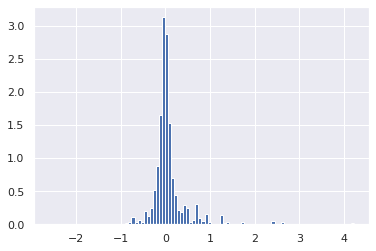

count    13622.000000
mean         0.071585
std          0.411070
min         -2.598044
25%         -0.085240
50%         -0.002413
75%          0.094364
max          4.219189
Name: ret_-1, dtype: float64

In [291]:
ret_class = 'ret_-1'
dfg = df.copy()

buy = dfg['buy'].values
ret = dfg[ret_class].values
fig, ax = plt.subplots()

_ = ax.hist(dfg[ret_class].values, bins=100, density=True)
plt.show()

dfg[ret_class].describe()

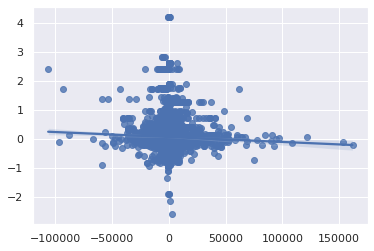

In [233]:
ax = sns.regplot(x=buy, y=ret)

## Conditional on Sell

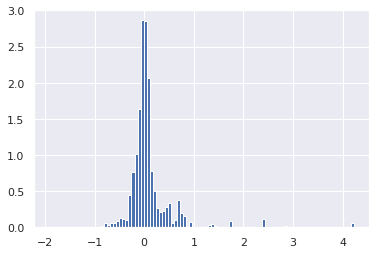

count    5627.000000
mean        0.083275
std         0.449292
min        -1.910930
25%        -0.089168
50%         0.003723
75%         0.103689
max         4.219189
Name: ret_-1, dtype: float64

In [292]:
dfg = df.loc[(df['buy']<0)]

buy = dfg['buy'].values
ret = dfg[ret_class].values

fig, ax = plt.subplots()

_ = ax.hist(ret,bins=100, density=True)
plt.show()

df.loc[(df['buy'] <0)][ret_class].describe()

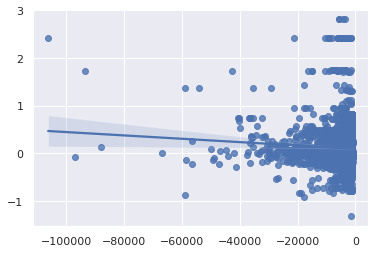

In [251]:
ax = sns.regplot(x=buy, y=ret)

## Conditional on Buy

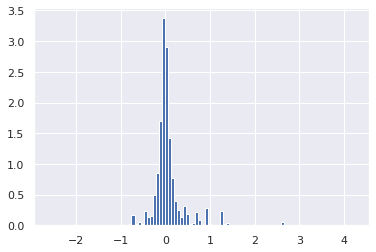

count    7995.000000
mean        0.063357
std         0.381697
min        -2.598044
25%        -0.082715
50%        -0.004826
75%         0.090695
max         4.219189
Name: ret_-1, dtype: float64

In [294]:
dfg = df.loc[(df['buy']>0)]

buy = dfg['buy'].values
ret = dfg[ret_class].values

fig, ax = plt.subplots()

_ = ax.hist(ret,bins=100, density=True)
plt.show()

df.loc[(df['buy'] >0)][ret_class].describe()

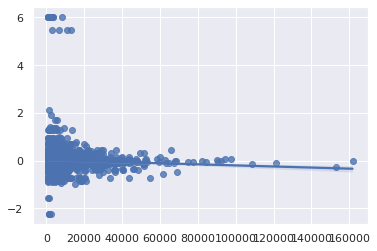

In [222]:
ax = sns.regplot(x=buy, y=ret)

# Check

In [ ]:
for chain in ['ethereum', 'binance', 'avalanche', 'polygon']:
    dfs = []
    
    for dex in chain_info(chain):

        
        lst = pd.read_csv(f'{WD}connected_wallet_transaction/list/layer_one_{dex}.csv')
        
        total = lst.loc[lst['status'] > 0].shape[0]
        num = 0
        
        dfs.append(df)

## Sample

In [10]:
df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')
df

/tmp/ipykernel_4169457/2621822460.py:1: DtypeWarning: Columns (4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{WD}connected_wallet_transaction/list_lp/panel_buy_ret.csv')


Unnamed: 0     amountUSD  \
0               0   4716.034753   
1               1   3440.269325   
2               2  13438.549182   
3               3   4739.261742   
4               4   9395.642762   
...           ...           ...   
17186        1859    273.705672   
17187        1860     15.195272   
17188        1861     11.891232   
17189        1862   9777.111034   
17190        1863   2559.114564   

                                                                             id  \
0      0x32e202a99c5e6b2903a42091a18275f7b569e74691619068d558c48b8e673273#35108   
1       0x61557173b7915909aa7a59a498df0b95ae81a7eb9f96c1ef383d7f741d6f2d54#4159   
2      0x65f59004c63eb6a050bb0f07b487d2fb4136093ad21c1a48523dc7250a4d871a#35267   
3      0x68820692482be09c9ad2f35fa77d56c8531bf2aeb1a252071ac8660fa81522bc#35061   
4      0x6b4738f70a48c925508c064b9b25c59b602a8b0bca40234888a74f16456204cd#35008   
...                                                                         ...   
17186      0xfb1d579d3c7c007e79341206d30bba3051ecf81ca907383167f670ab56787357-2   
17187      0x4e2859f1054a34864e786fac79710382ce3cbac30cb233190a608eec365f255f-0   
17188      0x8eb7e949aa3cd88d8b1bd70c86d7afcc652aa29a4724ac101d38baf9eccd826a-0   
17189      0x5d44ad1d5b06deb2b7ac551553f25eaf76babc21aab6e1bf7b06407e5c7eb4a2-0   
17190      0x693bac7bd806fa0ff799edc9ae384ac4c0d26b74dd363c03518f0a79586079bd-0   

       logIndex                                      origin  \
0           128  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
1           238  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
2           218  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
3           246  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
4           503  0x019ab937d61c50ef3d403b284ab8cb97ea432e5b   
...         ...                                         ...   
17186       185                                         NaN   
17187        29                                         NaN   
17188       146                                         NaN   
17189        35                                         NaN   
17190        15                                         NaN   

                                        recipient  \
0      0xe592427a0aece92de3edee1f18e0157c05861564   
1      0xe592427a0aece92de3edee1f18e0157c05861564   
2      0xe592427a0aece92de3edee1f18e0157c05861564   
3      0xe592427a0aece92de3edee1f18e0157c05861564   
4      0xe592427a0aece92de3edee1f18e0157c05861564   
...                                           ...   
17186                                         NaN   
17187                                         NaN   
17188                                         NaN   
17189                                         NaN   
17190                                         NaN   

                                           sender               sqrtPriceX96  \
0      0xe592427a0aece92de3edee1f18e0157c05861564  5793943713510455061261008   
1      0xe592427a0aece92de3edee1f18e0157c05861564  5882669073238910139704757   
2      0xe592427a0aece92de3edee1f18e0157c05861564  5410753122161088461152041   
3      0xe592427a0aece92de3edee1f18e0157c05861564  5253779681341213786251129   
4      0xe592427a0aece92de3edee1f18e0157c05861564  5536282705617953147498033   
...                                           ...                        ...   
17186  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17187  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17188  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17189  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   
17190  0xe54ca86531e17ef3616d22ca28b0d458b6c89106                        NaN   

           tick            timestamp token0_name    token1_name  \
0     -190476.0  2021-12-01 09:28:17  Tiger King  Wrapped Ether   
1     -190172.0  2021-10-03 21:55:41  Tiger King  Wrapped Ether   
2     -191844.0  2021-12-02 09:16

In [11]:
df.loc[(df['token0_name'] == 'FLOKI')|(df['token1_name'] == 'FLOKI')]

Unnamed: 0     amountUSD  \
10459       11945  39910.714535   
10460       11962   8616.048012   
10461       11963   2934.987713   
10462       11964   2494.260936   
10463       11965   2329.903532   
...           ...           ...   
13651       22662  10547.230421   
13652       22673   3670.784343   
13653       22674  11306.867159   
13654       22681    340.615989   
13655       22682   3236.703874   

                                                                         id  \
10459  0x06f232f8c1b20fcb489fb2ddf6ab072778ab4b030fe75e68f393fd39e1adba1e-1   
10460  0x0fc6d3cb0d3cc10c03de5049210304376c6aaf2124d4a3417e56c8a426b4d703-0   
10461  0x30336383f87cb55991136cd86a6c55548cff9716d2513fcb0e63061c0247a666-0   
10462  0x45806e4c52b2c01f35457103e5d863bae4e38c4e91b7984b4b5b236ec8f7f7a3-0   
10463  0x5a1d21eeb0bad8a7c310b5321f744e0d67d680238ee2b0e960f63f25e2433df9-0   
...                                                                     ...   
13651  0x198a3abaa22bb8d14367edd7f58531ae86c2d3a29d227ac44a77c66ea4908899-1   
13652  0xf8519cb5b6e11991e4496c60152ac782db5ad201be0687d2de448019b50f3b6b-1   
13653  0xf9c2dfb1f055de26d1ddd2b2b12ac755a880130d8654c65c14ca80793f3e0bad-1   
13654  0x5f031abedbd74dd91f0c7a163398d97d6a04287ba4c4735898b07f31c968eee9-0   
13655  0x392339deca8624da0b55613b7bf8ab83da11a74457a1e8f4c8cb3411bf1be1ab-0   

       logIndex origin recipient                                      sender  \
10459       615    NaN       NaN  0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
10460        92    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
10461       323    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
10462       250    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
10463       158    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
...         ...    ...       ...                                         ...   
13651       610    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
13652       337    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
13653       566    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
13654       229    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   
13655       348    NaN       NaN  0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45   

      sqrtPriceX96  tick            timestamp    token0_name token1_name  \
10459          NaN   NaN  2022-01-26 02:06:48  Wrapped Ether       FLOKI   
10460          NaN   NaN  2022-04-25 13:48:27  Wrapped Ether       FLOKI   
10461          NaN   NaN  2022-04-18 17:08:58  Wrapped Ether       FLOKI   
10462          NaN   NaN  2022-03-02 02:46:53  Wrapped Ether       FLOKI   
10463          NaN   NaN  2022-05-11 12:36:24  Wrapped Ether       FLOKI   
...            ...   ...                  ...            ...         ...   
13651          NaN   NaN  2022-05-07 12:09:31  Wrapped Ether       FLOKI   
13652          NaN   NaN  2022-05-15 17:10:06  Wrapped Ether       FLOKI   
13653          NaN   NaN  2022-05-03 13:57:43  Wrapped Ether       FLOKI   
13654          NaN   NaN  2022-03-28 20:26:01  Wrapped Ether       FLOKI   
13655          NaN   NaN  2022-04-05 12:05:44  Wrapped Ether       FLOKI   

                                        token0_id  \
10459  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
10460  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
10461  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
10462  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
10463  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
...                                           ...   
13651  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
13652  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
13653  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
13654  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
13655  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

                                        token1_id  \
10459  0xcf0c122c6b73ff809c693db761e7baebe62b6a2e   
10460  0xcf0c122c6b7

## Connection

### Main Panel

In [ ]:
lst = pd.read_csv(f'{WD}connected_wallet/panel/panel.csv')
lst.loc[lst['layer_one'] == '0x00465eaaa5db8379b16cc46111e50ce7574b2a51']

Empty DataFrame
Columns: [blockNumber, timeStamp, hash, nonce, blockHash, from, contractAddress, to, value, tokenName, tokenSymbol, tokenDecimal, transactionIndex, gas, gasPrice, gasUsed, cumulativeGasUsed, input, confirmations, root, chain, token_type, layer_one, insider_contractAddress, avg_priceUSD, token_number, status, datetime, date]
Index: []

### 10,000

In [18]:
df1 = pd.read_csv(f'{WD}connected_wallet/panel/from_10000.csv')
df2 = pd.read_csv(f'{WD}connected_wallet/panel/to_10000.csv')
df1.loc[df1['to'] == '0x00465eaaa5db8379b16cc46111e50ce7574b2a51']
df2.loc[df2['from'] == '0x00465eaaa5db8379b16cc46111e50ce7574b2a51']

to  \
12  0x00465eaaa5db8379b16cc46111e50ce7574b2a51   

                       insider_contractAddress      amountUSD  \
12  0xcf0c122c6b73ff809c693db761e7baebe62b6a2e  279780.809859   

                                          root     chain tokenName  \
12  0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b  ethereum     FLOKI   

   tokenSymbol    token_type  
12       FLOKI  normal_token

Empty DataFrame
Columns: [from, insider_contractAddress, amountUSD, root, chain, tokenName, tokenSymbol, token_type]
Index: []

In [21]:
root = '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b'
chain = 'ethereum'
token_type = 'normal_token'
df = pd.read_csv(f'{RD}connected_accounts/csv/{root}_{chain}_{token_type}.csv')
df.loc[df['to'] == '0x00465eaaa5db8379b16cc46111e50ce7574b2a51']

blockNumber   timeStamp  \
53047     14061605  1642937566   

                                                                     hash  \
53047  0xa981747ffe2846a2dd823621f3097add70e98c30b48963d1e849d06e637e93ce   

       nonce  \
53047   1165   

                                                                blockHash  \
53047  0x63ef5ace5c8c477c8ebabf0405c231e412f0b769ebd6ebf5f007e7587038535f   

                                             from  \
53047  0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b   

                                  contractAddress  \
53047  0xcf0c122c6b73ff809c693db761e7baebe62b6a2e   

                                               to                value  \
53047  0x00465eaaa5db8379b16cc46111e50ce7574b2a51  5774922795868631633   

      tokenName tokenSymbol  tokenDecimal  transactionIndex      gas  \
53047     FLOKI       FLOKI             9                76  4130067   

          gasPrice  gasUsed  cumulativeGasUsed       input  confirmations  
53047  95000000000  3849348           16480581  deprecated        1339567

## Token Price

In [66]:
token_dollar_price(contract='0xcf0c122c6b73ff809c693db761e7baebe62b6a2e',
                   chain='ethereum',
                   timestamp=pd.to_datetime('2022-01-27 01:06:48'))

4.07824719356e-05

uniswapv3_ethereum
uniswapv2_ethereum


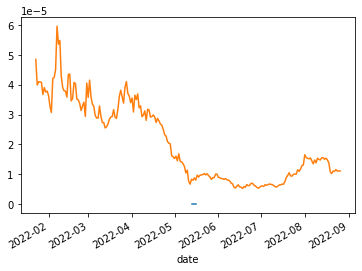

In [62]:
token_price_chart(contract = '0xcf0c122c6b73ff809c693db761e7baebe62b6a2e',
                  chain = 'ethereum')

# Test

## Function

### Insider Transaction

In [5]:
def insider_transaction(address, dex):
    

    dfs = []
    for role in dex_info(dex)['role']:

        post = {"query":dex_info(dex)['post'].substitute({'role': role, 'address':address})}
        url = dex_info(dex)['url']

        r = requests.post(url, json=post)
        data = r.json()
        df = pd.DataFrame.from_dict(data['data']['swaps'])

        if df.shape[0] == 0:
            continue

        if dex_info(dex)['style'] == 0:
            df['token0_name'] = df['token0'].apply(lambda x: x['name'])
            df['token1_name'] = df['token1'].apply(lambda x: x['name'])
            df['token0_id'] = df['token0'].apply(lambda x: x['id'])
            df['token1_id'] = df['token1'].apply(lambda x: x['id'])
            df['transaction_id'] = df['transaction'].apply(lambda x: x['id'])
            df.drop(columns=['token0', 'token1', 'transaction'], inplace=True)
        else:
            if dex_info(dex)['style'] == 1:
                df['token0_name'] = df['pair'].apply(lambda x: x['token0']['name'])
                df['token1_name'] = df['pair'].apply(lambda x: x['token1']['name'])
                df['token0_id'] = df['pair'].apply(lambda x: x['token0']['id'])
                df['token1_id'] = df['pair'].apply(lambda x: x['token1']['id'])
                df['transaction_id'] = df['transaction'].apply(lambda x: x['id'])
                df.drop(columns=['pair', 'transaction'], inplace=True)
        
        df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s', origin='unix')
        
        if dex == 'uniswapv3_ethereum': df = uniswapv3_correction(df)
        
        df = df.loc[df[role] == address]
        if df.shape[0] == 0:
            continue

        dfs.append(df)

    if len(dfs) != 0: 
        dfs = pd.concat(dfs)
        dfs.drop_duplicates('id', inplace=True)

    return dfs

In [6]:
def uniswapv3_correction(df):
    
    df['amount0'] = df['amount0'].astype('float')
    df['amount1'] = df['amount1'].astype('float')
    for idx, row in df.iterrows():
        if row['amount0'] > 0:
            df.loc[df['id'] == row['id'], 'amount0Out'] = 0
            df.loc[df['id'] == row['id'], 'amount0In'] = abs(row['amount0'])
            df.loc[df['id'] == row['id'], 'amount1Out'] = abs(row['amount1'])
            df.loc[df['id'] == row['id'], 'amount1In'] = 0

        else:
            df.loc[df['id'] == row['id'], 'amount0Out'] = abs(row['amount0'])
            df.loc[df['id'] == row['id'], 'amount0In'] = 0
            df.loc[df['id'] == row['id'], 'amount1Out'] = 0
            df.loc[df['id'] == row['id'], 'amount1In'] = abs(row['amount1'])
    df.drop(columns=['amount1', 'amount0'], inplace=True)
    return df

In [7]:
def home_token_filter(df, insider_contractAddress):
    df['home_token'] = False
    df.loc[(df['token0_id'] == insider_contractAddress)|(df['token1_id'] == insider_contractAddress), 'home_token'] = True
    return df

In [8]:
def liquidity_provision(transaction_id, chain):
    
    time.sleep(1 + random.random() * 2)
    headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}

    if chain == 'ethereum': url = f'https://etherscan.io/tx/{transaction_id}'
    if chain == 'binance' : url = f'https://bscscan.com/tx/{transaction_id}'
    if chain == 'avalanche': url = f'https://snowtrace.io/tx/{transaction_id}'
    if chain == 'polygon' : url = f'https://polygonscan.com/tx/{transaction_id}'
    if chain == 'fantom' : url = f'https://ftmscan.com/tx/{transaction_id}'

    r = requests.get(url, headers=headers)
    if re.search('liquidity to', r.text.lower()) != None:
        return True
    else:
        return False

In [9]:
def chain_info(chain):
    dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
             'binance':['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
             'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
             'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
             'polygon':['sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
            }
    
    dex = dexes[chain]
    return dex

# def chain_info(chain):
#     dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
#              'binance':['biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
#              'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
#              'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
#              'polygon':['sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
#             }
    
#     dex = dexes[chain]
#     return dex

In [10]:
def dex_info(dex):
    dex_infos = {
                'uniswapv3_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswap-v3-subgraph',
                                       'role': 1,
                                       'style': 0,
                                       'post': 1
                                      },
                
                'uniswapv2_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'sushiswap_ethereum':{'url': 'https://api.thegraph.com/subgraphs/name/sushiswap/exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },
        
                'pancake_binance':{'url': 'https://bsc.streamingfast.io/subgraphs/name/pancakeswap/exchange-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'biswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/biswapcom/exchange5',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'apeswap_binance':{'url': 'https://graph2.apeswap.finance/subgraphs/name/ape-swap/apeswap-subgraph',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'babyswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/loremboard/bsc-babyswap-subgraph',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'jetswap_binance':{'url': 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'traderjoe_avalanche':{'url': 'https://api.thegraph.com/subgraphs/name/traderjoe-xyz/exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      }, 
        
                'pangolin_avalanche':{'url': 'https://api.thegraph.com/subgraphs/name/dasconnor/pangolin-dex',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },  
        
                'spookyswap_fantom':{'url': 'https://api.thegraph.com/subgraphs/name/int3grtor/spooky-exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },  
        
                'spiritswap_fantom':{'url': 'https://api.thegraph.com/subgraphs/name/evele/spirit-swap-subgraph-dev-v2',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },  
        
                'sushiswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/sushiswap/matic-exchange',
                                       'role': 2,
                                       'style': 1,
                                       'post': 2
                                      },
        
                'apeswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/apeswapfinance/dex-polygon',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
        
                'jetswap_polygon':{'url': 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-polygon-v2',
                                       'role': 0,
                                       'style': 1,
                                       'post': 0
                                      },
                }
    
    roles = [['from', 'to', 'sender'],
             ['origin', 'recipient', 'sender'],
             ['sender', 'to']]
    
    url = dex_infos[dex]['url']
    role = roles[dex_infos[dex]['role']]
    style = dex_infos[dex]['style']
    post = dex_infos[dex]['post']
    
    info = {'url':url,
            'post':post_string(post),
            'role':role,
            'style':style
           }

    return info

In [11]:
def post_string(post):
    if post == 0:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0In
    amount0Out
    amount1In
    amount1Out
    amountUSD
    from
    id
    logIndex
    to
    timestamp
    sender
    pair {
      token0 {
        id
        name
      }
      token1 {
        id
        name
      }
    }
    transaction {
      id
    }
  }
}""")
        
    if post == 1:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0
    amount1
    amountUSD
    id
    logIndex
    origin
    recipient
    sender
    sqrtPriceX96
    tick
    timestamp
    token0 {
      id
      name
    }
    token1 {
      id
      name
    }
    transaction {
      id
    }
  }
}""")
        
    if post == 2:
        query = string.Template("""query MyQuery {
  swaps(first: 1000, where: {$role: "$address"}) {
    amount0In
    amount0Out
    amount1In
    amount1Out
    amountUSD
    id
    logIndex
    sender
    timestamp
    to
    pair {
      token0 {
        id
        name
      }
      token1 {
        id
        name
      }
    }
    transaction {
      id
    }
  }
}""")
    return query

### Token Price

In [12]:
def token_dollar_price(contract, chain, timestamp):
    
        contractAddress_lower = contract.lower()
        contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)

        date = timestamp.strftime('%Y-%m-%d')
        
        priceUSD = 0
        dex_num = 0
        avg_priceUSD = 0

        for dex in chain_info(chain):
            lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
            csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                                (lst['contractAddress'] == contractAddress_upper))]
            
            if csv_info['contractAddress'].values[0] == contractAddress_lower:
                contractAddress = contractAddress_lower
            else:
                contractAddress = contractAddress_upper

            status = csv_info['status'].values[0]
            dexn = csv_info['dex'].values[0]

            if status == 0: 
                continue
            elif dexn == 0:
                continue
            else:
                csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
                price_info = csv.loc[(pd.to_datetime(csv['date']) > pd.to_datetime(timestamp) - datetime.timedelta(days=1))&
                                  (pd.to_datetime(csv['date']) < pd.to_datetime(timestamp))]
                
                if price_info.shape[0] != 0:
                    price = price_info['priceUSD'].values[0]
                    if price != 0:  
                        priceUSD += price
                        dex_num += 1

        if dex_num != 0: 
            return priceUSD/dex_num
        if dex_num == 0:
            return 0
        
def token_dollar_price_date(contract, chain, date):
    
        contractAddress_lower = contract.lower()
        contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)
        
        priceUSD = 0
        dex_num = 0
        avg_priceUSD = 0

        for dex in chain_info(chain):
            lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
            csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                                (lst['contractAddress'] == contractAddress_upper))]
            
            if csv_info['contractAddress'].values[0] == contractAddress_lower:
                contractAddress = contractAddress_lower
            else:
                contractAddress = contractAddress_upper

            status = csv_info['status'].values[0]
            dexn = csv_info['dex'].values[0]

            if status == 0: 
                continue
            elif dexn == 0:
                continue
            else:
                csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
                price_info = csv.loc[(pd.to_datetime(csv['date']) == pd.to_datetime(date))]
                
                if price_info.shape[0] != 0:
                    price = price_info['priceUSD'].values[0]
                    if price != 0:  
                        priceUSD += price
                        dex_num += 1

        if dex_num != 0: 
            return priceUSD/dex_num
        if dex_num == 0:
            return 0

### Token Return

In [13]:
def token_return(after, day, contract, chain, timestamp):
    if after == True:
        start_date = pd.to_datetime(timestamp)
        end_date = pd.to_datetime(timestamp) + datetime.timedelta(days=day)
        
        start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
        end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)
        
    else:
        start_date = pd.to_datetime(timestamp) - datetime.timedelta(days=day+1)
        end_date = pd.to_datetime(timestamp) - datetime.timedelta(days=1)
        
        start_price = token_dollar_price(contract=contract, chain=chain, timestamp=start_date)
        end_price = token_dollar_price(contract=contract, chain=chain, timestamp=end_date)
    
    if (end_price == 0)|(start_price==0):
        return np.nan
    else:
        return np.log(end_price/start_price)
    
def token_return_date(after, day, contract, chain, date):
    if after == True:
        start_date = pd.to_datetime(date)
        end_date = pd.to_datetime(date) + datetime.timedelta(days=day)
        
        start_price = token_dollar_price_date(contract=contract, chain=chain, date=start_date)
        end_price = token_dollar_price_date(contract=contract, chain=chain, date=end_date)
        
    else:
        start_date = pd.to_datetime(date) - datetime.timedelta(days=day+1)
        end_date = pd.to_datetime(date) - datetime.timedelta(days=1)
        
        start_price = token_dollar_price_date(contract=contract, chain=chain, date=start_date)
        end_price = token_dollar_price_date(contract=contract, chain=chain, date=end_date)
    
    if (end_price == 0)|(start_price==0):
        return np.nan
    else:
        return np.log(end_price/start_price)

### Token Price Chart

In [14]:
def token_price_chart(contract, chain):

    contractAddress_lower = contract.lower()
    contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)

    priceUSD = 0
    dex_num = 0
    avg_priceUSD = 0

    for dex in chain_info(chain):
        lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
        csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
                            (lst['contractAddress'] == contractAddress_upper))]

        if csv_info['contractAddress'].values[0] == contractAddress_lower:
            contractAddress = contractAddress_lower
        else:
            contractAddress = contractAddress_upper

        status = csv_info['status'].values[0]
        dexn = csv_info['dex'].values[0]

        if status == 0: 
            continue
        elif dexn == 0:
            continue
        else:
            csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
            print(dex)
            csv['date'] = pd.to_datetime(csv['date'])
            csv.sort_values('date', ascending=True).set_index('date')['priceUSD'].astype('float').plot()

## Test

In [15]:
# chain_info('ethereum')
# dex_info('sushiswap_polygon')

In [16]:
# address = '0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b'
# insider_contractAddress = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
# chain = 'ethereum'

# dex = 'uniswapv2_ethereum'
# df = insider_transaction(address=address, dex=dex)
# if len(df) == 0:
#     print('no outcome')
# else:
#     df.shape[0]
#     dex
#     df
# if len(df) == 0:
#     print('no outcome')
# else:
#     dfs = home_token_filter(df, insider_contractAddress)
#     dfs.shape[0]
#     dfs
    
# dfs = exclude_liquidity_provision(dfs, chain)
# dfs.shape[0]
# dfs

### Token Price

In [17]:
token_dollar_price(contract = '0x24e89bdf2f65326b94e36978a7edeac63623dafa',
                   chain = 'ethereum',
                   timestamp = pd.to_datetime('2021-12-01 09:28:17'))

2.21370009232e-05

In [18]:
timestamp = pd.to_datetime('2021-12-01 09:28:17')
date = timestamp.strftime('%Y-%m-%d')
date

token_dollar_price_date(contract = '0x24e89bdf2f65326b94e36978a7edeac63623dafa',
                        chain = 'ethereum',
                        date = date)

'2021-12-01'

2.21370009232e-05

In [19]:
# contract = '0x61ecd63e42c27415696e10864d70ecea4aa11289'
# chain = 'avalanche'
# timestamp = '2021-12-18 15:21:18'

# contractAddress_lower = contract.lower()
# contractAddress_upper = Web3.toChecksumAddress(contractAddress_lower)

# timestamp = pd.to_datetime(timestamp)
# date = timestamp.strftime('%Y-%m-%d')

# priceUSD = 0
# dex_num = 0
# avg_priceUSD = 0

# for dex in chain_info(chain):
#     dex
#     lst = pd.read_csv(f'{WD}/dex_price/list_all/{dex}.csv')
#     csv_info = lst.loc[((lst['contractAddress'] == contractAddress_lower)|
#                         (lst['contractAddress'] == contractAddress_upper))]

#     if csv_info['contractAddress'].values[0] == contractAddress_lower:
#         contractAddress = contractAddress_lower
#     else:
#         contractAddress = contractAddress_upper

#     status = csv_info['status'].values[0]
#     dexn = csv_info['dex'].values[0]

#     if status == 0: 
#         continue
#     elif dexn == 0:
#         continue
#     else:
#         csv = pd.read_csv(f'{WD}dex_price/csv_all/{contractAddress}_{dex}.csv') 
#         price_info = csv.loc[(pd.to_datetime(csv['date']) > pd.to_datetime(timestamp) - datetime.timedelta(days=1))&
#                           (pd.to_datetime(csv['date']) < pd.to_datetime(timestamp))]
#         price_info
#         if price_info.shape[0] != 0:
#             price = price_info['priceUSD'].values[0]
#             if price != 0:  
#                 priceUSD += price
#                 dex_num += 1

# if dex_num != 0: 
#     priceUSD/dex_num
# if dex_num == 0:
#     0

### Token Return

In [20]:
token_return(after=False, day=3, contract='0x24e89bdf2f65326b94e36978a7edeac63623dafa', chain='ethereum', timestamp='2021-12-01 09:28:17')

-0.2077392928163027

In [21]:
timestamp='2021-12-01 09:28:17'
timestamp = pd.to_datetime('2021-12-01 09:28:17')
date = timestamp.strftime('%Y-%m-%d')
date

token_return_date(after=False,
                 day=3,
                 contract='0x24e89bdf2f65326b94e36978a7edeac63623dafa',
                 chain='ethereum',
                 date=date) 

'2021-12-01'

-0.2077392928163027